In [1]:
# Imports
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
datasets = [train_data, test_data]

In [3]:
def kmeans_chart(prop, size = 0):
    krange = range(1,size if size > 0 else train_data[prop].value_counts().size)
    inertias = []
    for i in krange:
        kmeans = KMeans(n_clusters=i, random_state=0).fit(train_data[prop].values.reshape(train_data[prop].size,1))
        inertias.append(kmeans.inertia_)

    plt.plot(krange, inertias)
    plt.title(prop)
    plt.xlabel('cluster')
    plt.ylabel('inertia')
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
def scatter_chart(feature):
    survived = train_data[train_data['Survived']==1][feature]
    dead = train_data[train_data['Survived']==0][feature]
    y_survived = np.ones(survived.size)
    y_dead = np.zeros(dead.size)
    count_survived = survived.value_counts().to_dict()
    size_survived = survived.map(lambda x: count_survived[x]/survived.size*1000)
    count_dead = dead.value_counts().to_dict()
    size_dead = dead.map(lambda x: count_dead[x]/dead.size*1000)
    ax = plt.subplot(111)
#     ax.figure.figsize=[20, 20]
    ax.figure.set_figheight(20)
    ax.figure.set_figwidth(20)
#     ax.figure.colorbar()
    ax.scatter(y_survived, survived, marker='o', s=size_survived, alpha=0.3, cmap='viridis')
    ax.scatter(y_dead, dead, marker='o', c='r', s=size_dead, alpha=0.3)
    
#     plt.colorbar(ax.figure, ax=ax)
    ax.figure.show()

#     plt.scatter(y, survived, marker='o');

def class_distribuition(dataset, feature):
    plt.subplots(figsize = (16,16))
    ax = sns.countplot(x=feature, hue='Survived', data=dataset)
    plt.title('Class distribuition')
    leg = ax.get_legend()
    leg.set_title('Survived')
    legs = leg.texts
    legs[0] = 'No'
    legs[1] = 'Yes'

def distribuition(dataset, feature):
    plt.subplots(figsize = (15,10))
    ax = sns.kdeplot(dataset.loc[(train_data['Survived'] == 0), feature], color = 'r', shade=True, label = 'Not survived')
    ax = sns.kdeplot(dataset.loc[(train_data['Survived'] == 1), feature], color = 'b', shade=True, label = 'Survived')
    plt.title('Fare distribuition')
    plt.ylabel('Frequency of survivess')
    plt.xlabel(feature)

In [4]:
train_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
names = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_data['Title'] = names

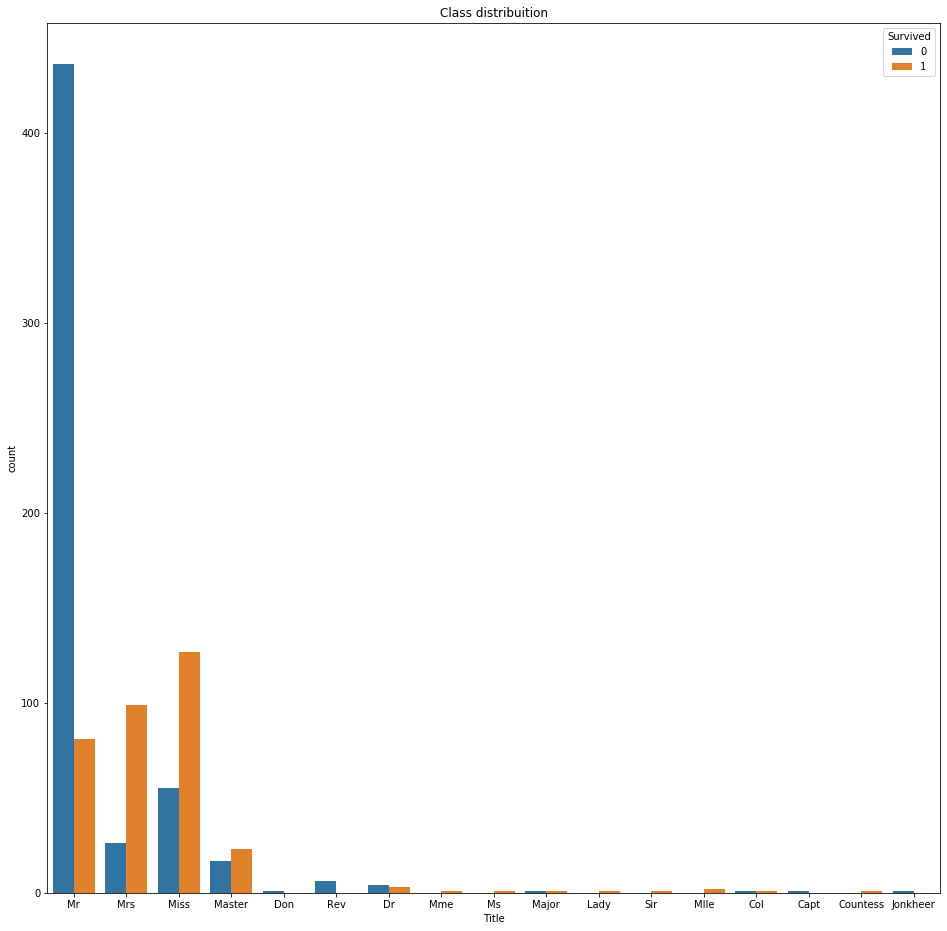

In [6]:
class_distribuition(train_data, 'Title')

In [7]:
# title_mapping = { "Mr": 1,                 
#                  "Major": 2, "Col": 3, "Jonkheer": 4,  
#                  "Don": 5,  "Capt": 6, "Ms": 7, "Sir": 8,  "Rev": 9, 
#                  "Dr": 10, "Master": 11,
#                  "Mrs": 12,
#                  "Miss": 13, "Mlle": 14, "Mme": 15, "Dona": 16, "Lady": 17, "Countess": 18          
#                   }
title_mapping = { "Mr": 0.156673,                 
                 "Major": 0.266667, "Col": 0.266667, "Jonkheer": 0.266667,  
                 "Don": 0.266667,  "Capt": 0.266667, "Ms": 0.266667, "Sir": 0.266667,  "Rev": 0.266667, 
                 "Dr": 0.553191, "Master": 0.553191,
                 "Mrs": 0.792000,
                 "Miss": 0.705882, "Mlle": 0.705882, "Mme": 0.705882, "Dona": 0.705882, "Lady": 0.705882, "Countess": 0.705882          
                  }
train_data['CTitle'] = names.map(title_mapping)
title_scaller = StandardScaler()
train_data['CTitle'] = title_scaller.fit_transform(train_data['CTitle'].values.reshape(-1,1), train_data['Survived'])

In [8]:
# train_data.groupby('CTitle')['Survived'].describe()
# distribuition(train_data, 'CTitle')


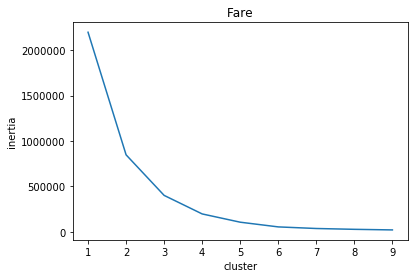

In [9]:
kmeans_chart('Fare', 10)
kmeans_fare = KMeans(n_clusters=4, random_state=0).fit(train_data.Fare.values.reshape(train_data.Fare.size,1))
def transform_fare(val):
    return kmeans_fare.predict([[val]])[0]
train_data['CFare'] =  train_data['Fare'].map(transform_fare)

In [10]:
train_data.groupby('CFare')['Survived'].describe()
fare_mapping = {
    0: 0.635714,
    1: 0.678571,
    2: 0.320833,
    3: 1
}
train_data['CFare'] = train_data['CFare'].map(fare_mapping)

In [11]:
# class_distribuition(train_data, 'CFare')
fare_scaller = StandardScaler()
train_data['CFare'] = fare_scaller.fit_transform(train_data['CFare'].values.reshape(-1,1), train_data['Survived'])

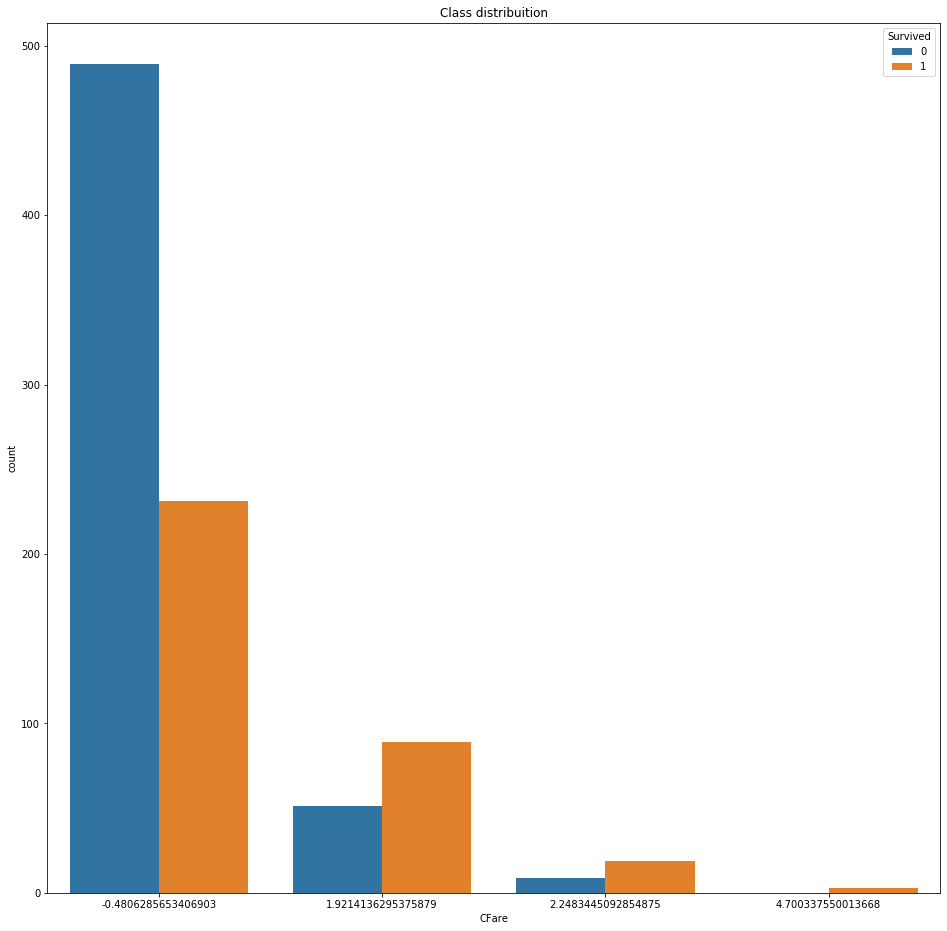

In [12]:
class_distribuition(train_data, 'CFare')

In [13]:
sex_mapping = { "male": 0, "female": 1}
train_data['Sex'] = train_data.Sex.map(sex_mapping)

In [14]:
train_data['Embarked'].fillna('C', inplace=True)
embarked_mapping = { "S": 0.336957, "C": 0.389610, "Q": 0.558824 }

train_data['CEmbarked'] = train_data.Embarked.map(embarked_mapping)

embarked_scaller = StandardScaler()
train_data['CEmbarked'] = embarked_scaller.fit_transform(train_data['CEmbarked'].values.reshape(-1,1), train_data['Survived'])


In [15]:
train_data.groupby('Embarked')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,170.0,0.558824,0.497995,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


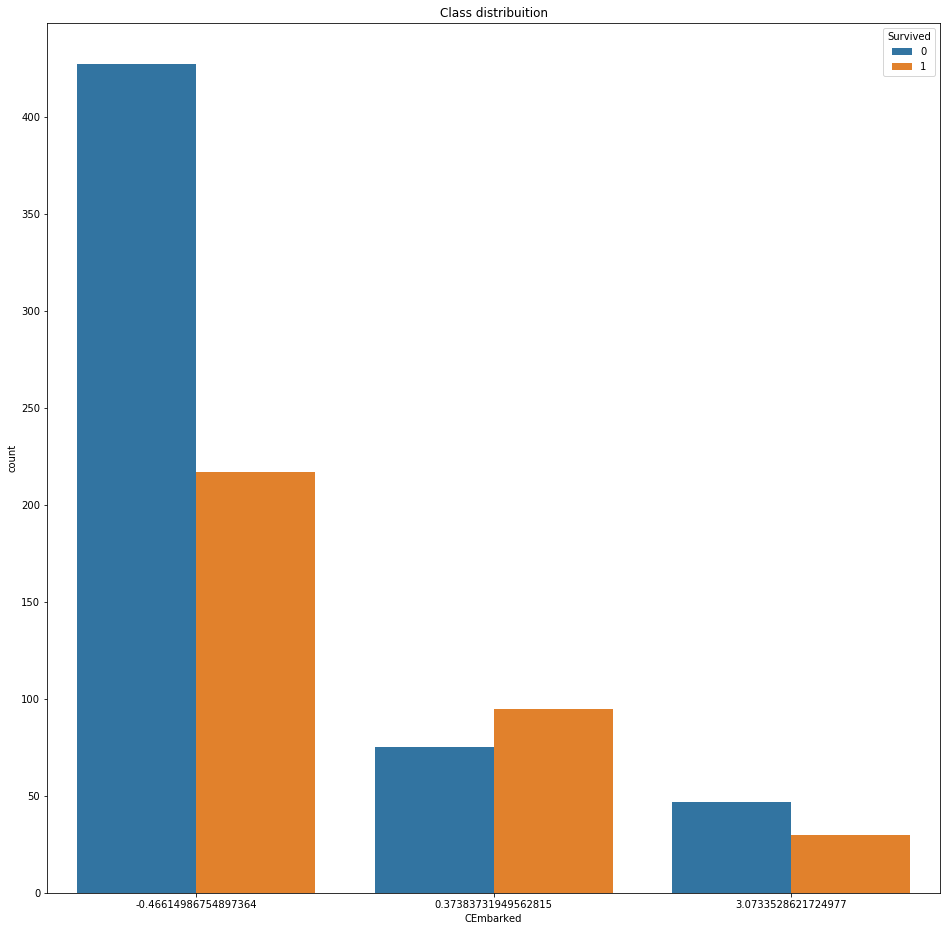

In [16]:
class_distribuition(train_data, 'CEmbarked')

In [17]:
means = train_data.groupby('Title')['Age'].mean().to_dict()
median = train_data['Age'].mean()
def median_age(row):
    if(np.isnan(row['Age'])):
#         row['Age'] = means[row['Title']]
        row['Age'] = median
    return row


# asd = age_test.fillna(train_data.groupby('Title')['Age'].mean().to_dict(), axis='Title')

train_data = train_data.apply(median_age, axis=1)

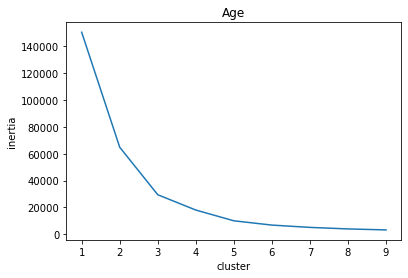

In [18]:
kmeans_chart('Age', 10)

In [19]:
def age_outliers(row):
    distance = 1.5 * (np.percentile(train_data['Age'], 75) - np.percentile(train_data['Age'], 25))
    if(row['Age'] > distance + np.percentile(train_data['Age'], 75)):
        row['Age'] = distance + np.percentile(train_data['Age'], 75)
    elif(row['Age'] < np.percentile(train_data['Age'], 25) - distance):
        row['Age'] = np.percentile(train_data['Age'], 25) - distance
    return row

train_data = train_data.apply(age_outliers, axis=1)

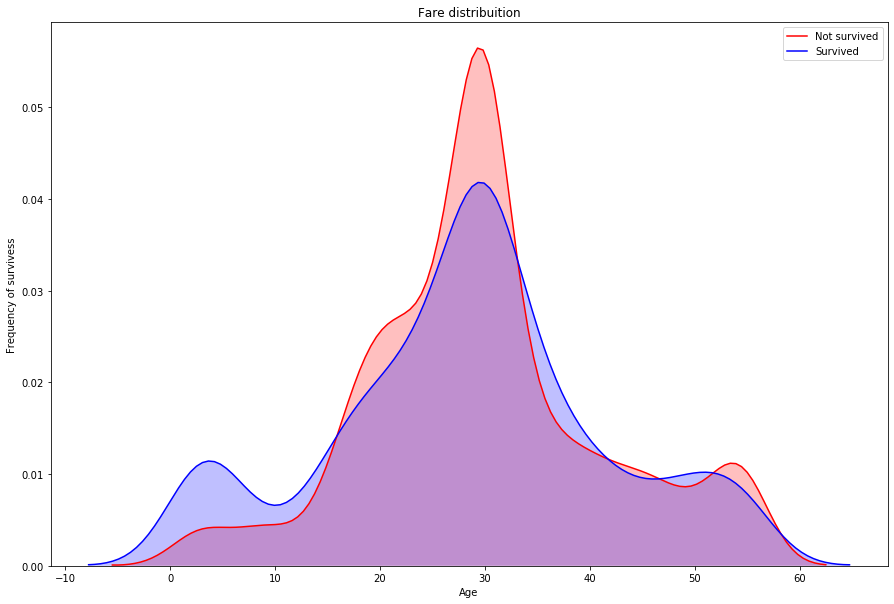

In [20]:
distribuition(train_data, 'Age')

In [21]:
age_scaller = StandardScaler()
train_data['CAge'] = age_scaller.fit_transform(train_data['Age'].values.reshape(-1,1), train_data['Survived'])


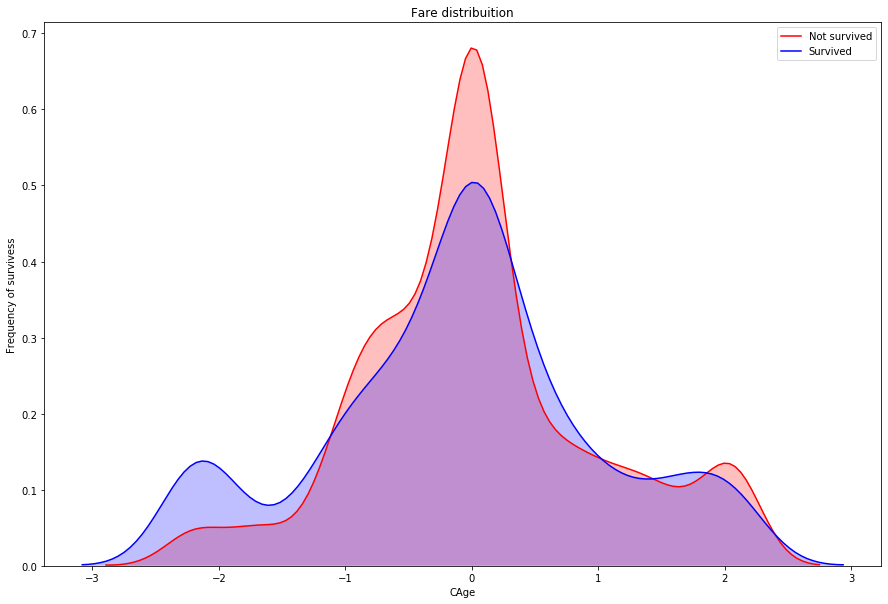

In [22]:
distribuition(train_data, 'CAge')

In [23]:
train_data['Parents'] = train_data['Parch'] + train_data['SibSp']


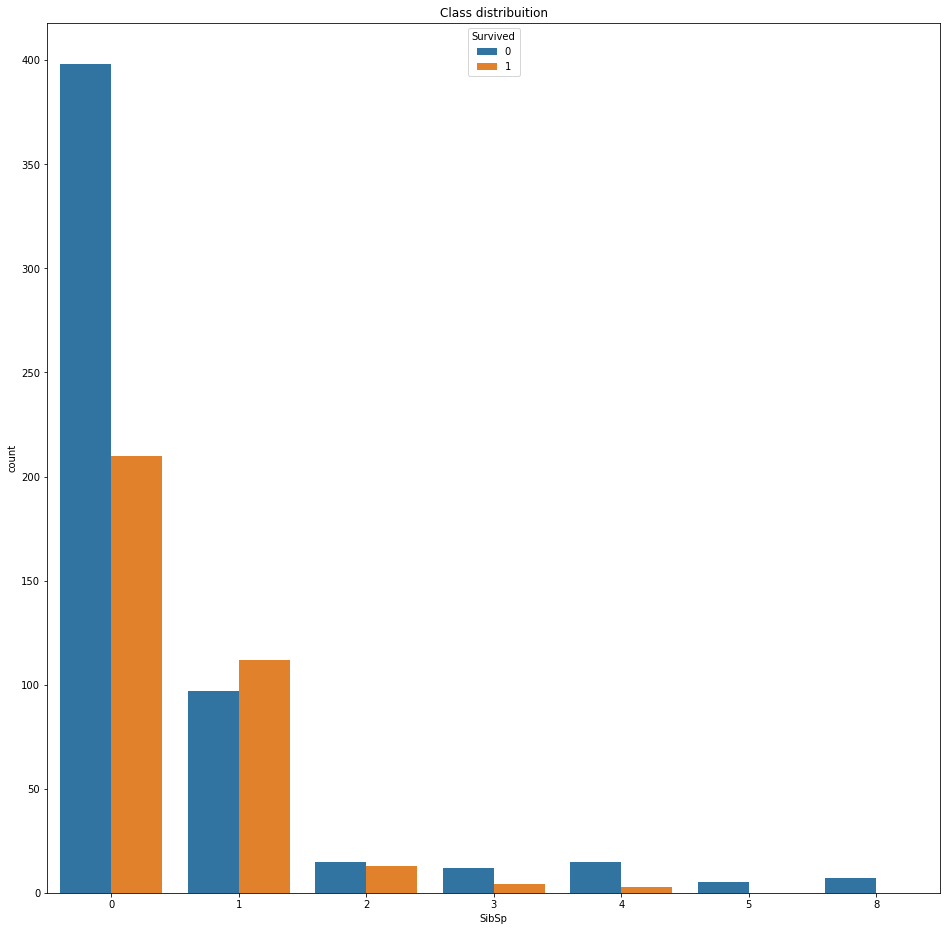

In [24]:
class_distribuition(train_data, 'SibSp')
sibsp_scaller = StandardScaler()
# fare_scaller.fit_transform(train_data['Fare'], train_data['Survived'])
# fares = train_data['Fare'].values.reshape(-1,1);
train_data['CSibSp'] = sibsp_scaller.fit_transform(train_data['SibSp'].values.reshape(-1,1), train_data['Survived'])
# age_scaller = StandardScaler()
# train_data['CAge'] = age_scaller.fit_transform(train_data['Age'].values.reshape(-1,1), train_data['Survived'])

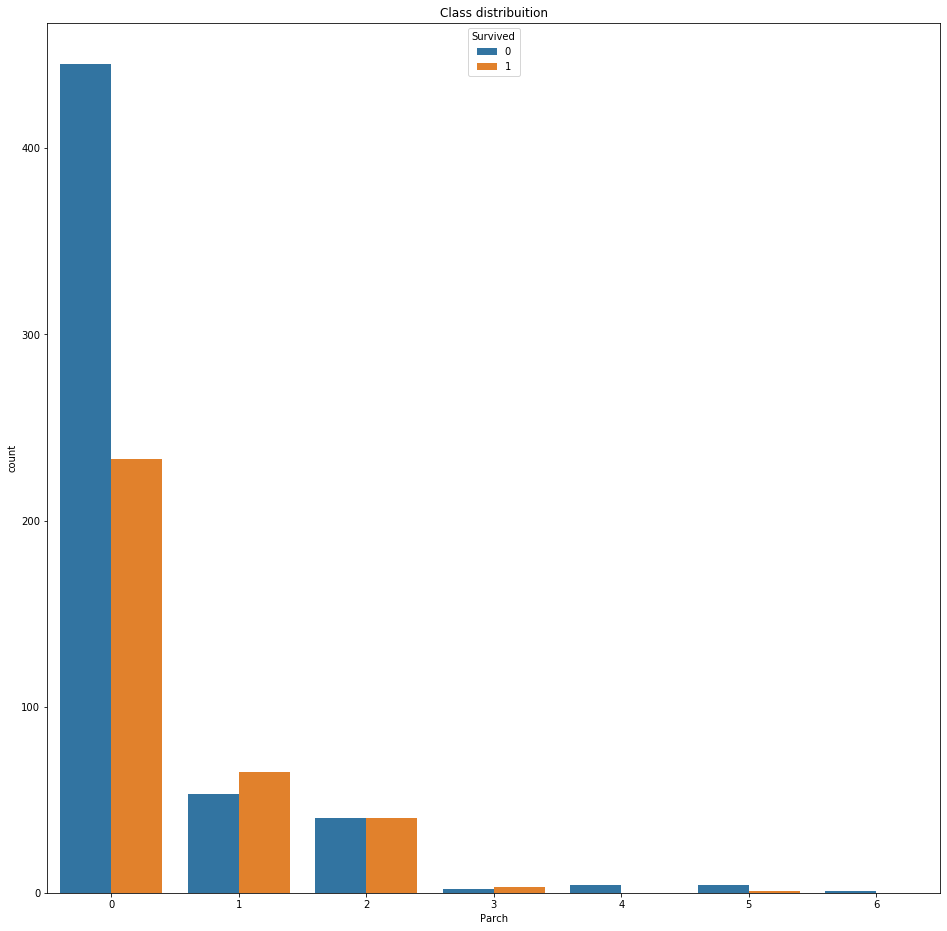

In [25]:
class_distribuition(train_data, 'Parch')
parch_scaller = StandardScaler()
train_data['CParch'] = parch_scaller.fit_transform(train_data['Parch'].values.reshape(-1,1), train_data['Survived'])


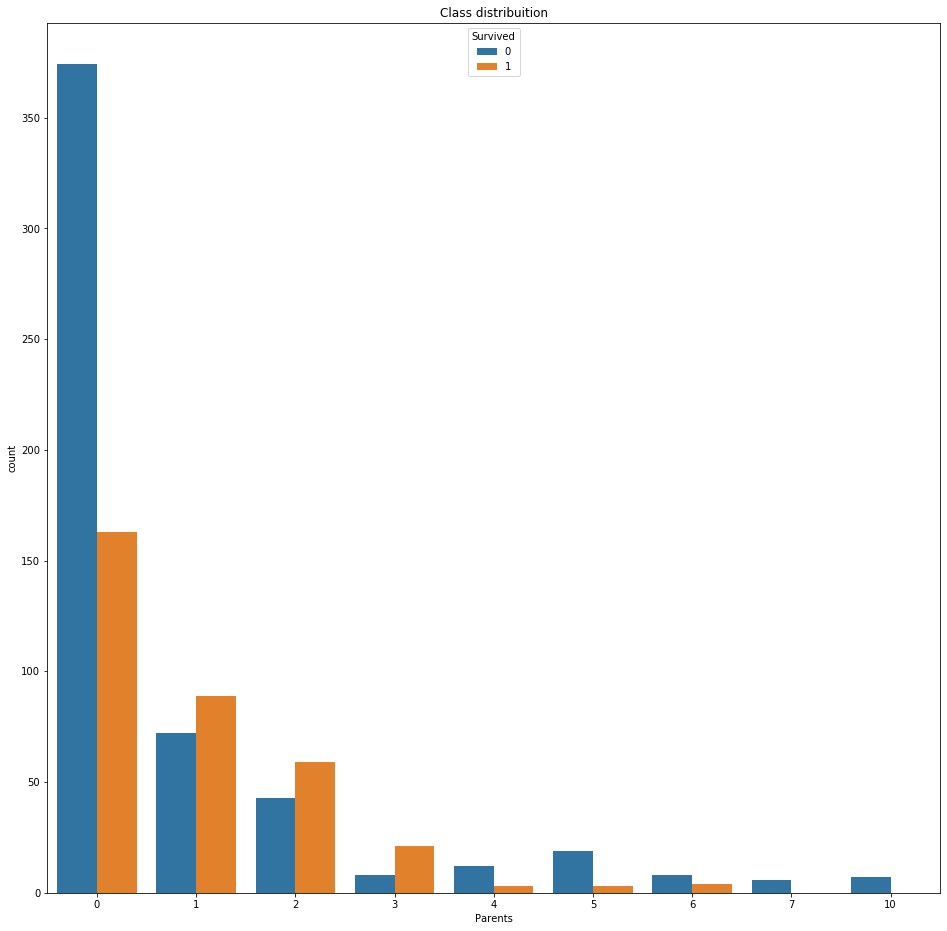

In [26]:
class_distribuition(train_data, 'Parents')
parent_mapping = {
    0: 0.303538,
    1: 0.562738, 2: 0.562738,
    3: 0.545455, 4: 0.545455,
    5: 0.148936, 6: 0.148936, 7: 0.148936, 8: 0.148936, 9: 0.148936, 10: 0.148936, 11: 0.148936, 12: 0.148936
}

train_data['CParents'] = train_data['Parents'].map(parent_mapping)

parent_scaller = StandardScaler()
train_data['CParents'] = parent_scaller.fit_transform(train_data['CParents'].values.reshape(-1,1), train_data['Survived'])


In [27]:
train_data.groupby('CParents')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
CParents,,,,,,,,
-1.773979,47.0,0.148936,0.359875,0.0,0.0,0.0,0.0,1.0
-0.606427,537.0,0.303538,0.460214,0.0,0.0,0.0,1.0,1.0
1.220526,44.0,0.545455,0.503686,0.0,0.0,1.0,1.0,1.0
1.351047,263.0,0.562738,0.496994,0.0,0.0,1.0,1.0,1.0


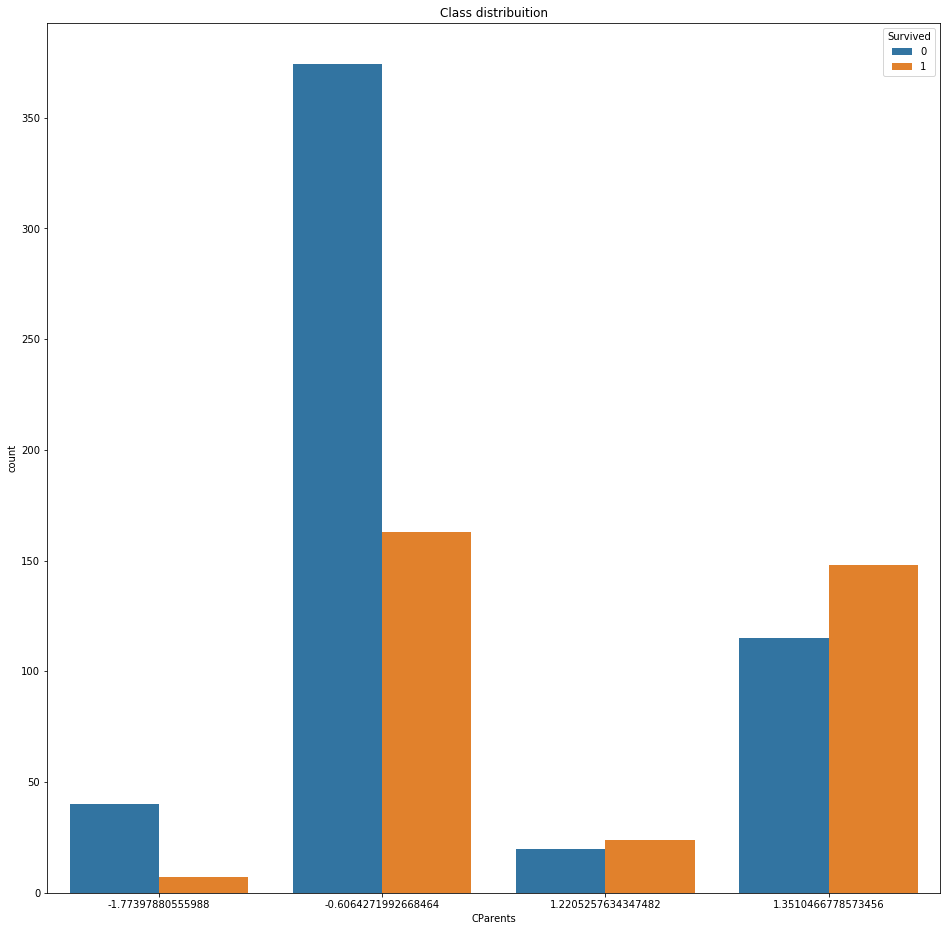

In [28]:
class_distribuition(train_data, 'CParents')
# 
# train_data['CParents'].isnull()
# train_data.isnull().sum()

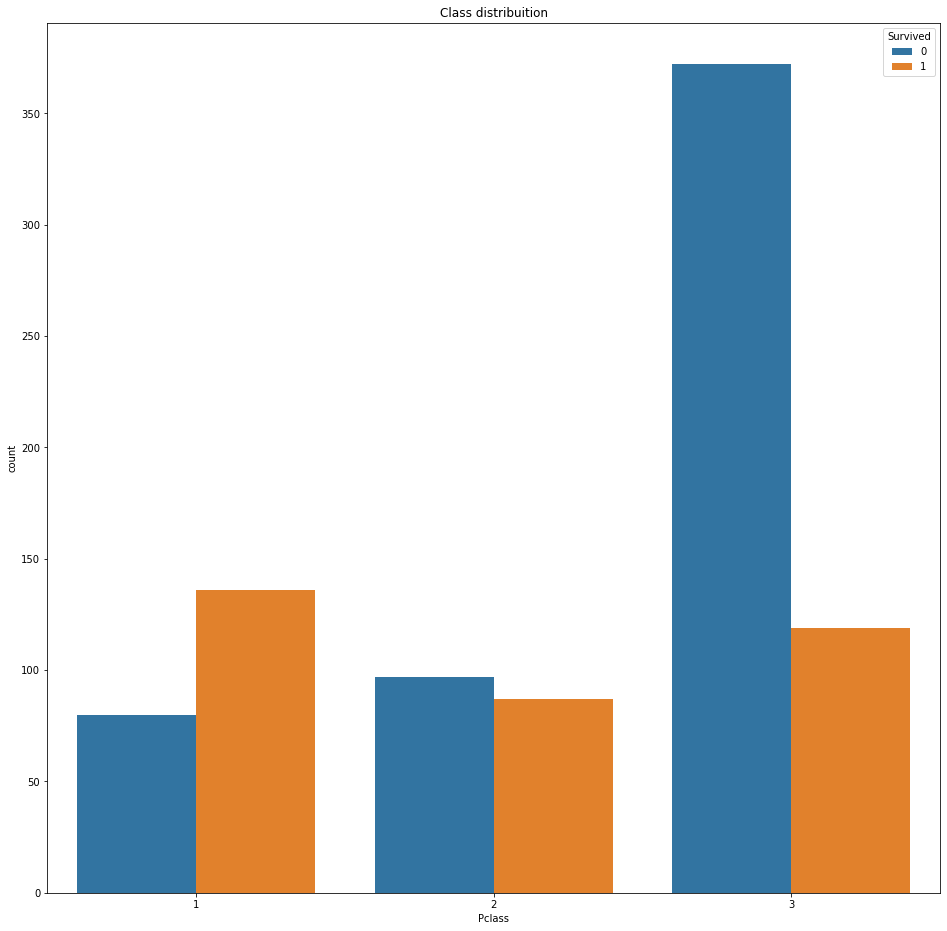

In [29]:
class_distribuition(train_data,'Pclass')

class_mapping = {
    3: 0.2423,
    2: 0.472826,
    1: 0.629630
}

train_data['CPclass'] = train_data['Pclass'].map(class_mapping)
class_scaller = StandardScaler()
train_data['CPclass'] = class_scaller.fit_transform(train_data['CPclass'].values.reshape(-1,1), train_data['Survived'])


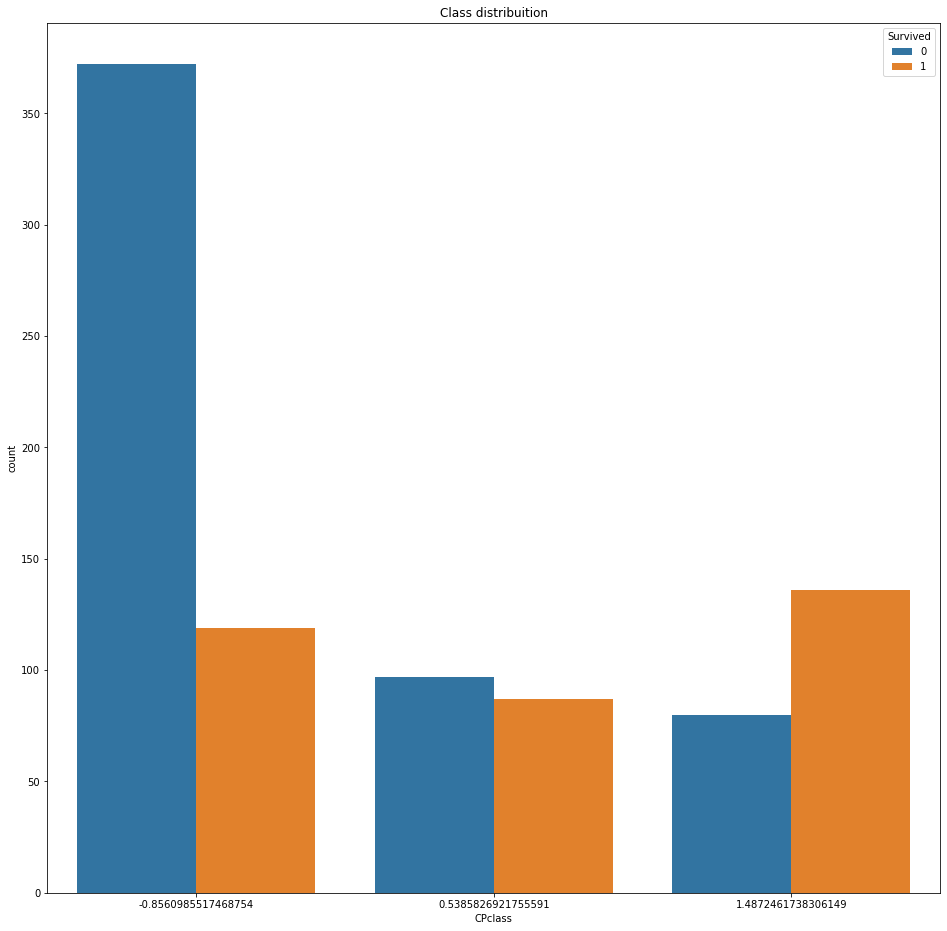

In [30]:
class_distribuition(train_data, 'CPclass')

In [31]:
y = train_data['Survived']
features = ['CPclass', 'CAge', 'CParents', 'CFare', 'Sex', 'CEmbarked', 'CTitle', 'CSibSp', 'CParch']
X = train_data[features]


Text(0.5, 1, 'Correlations')

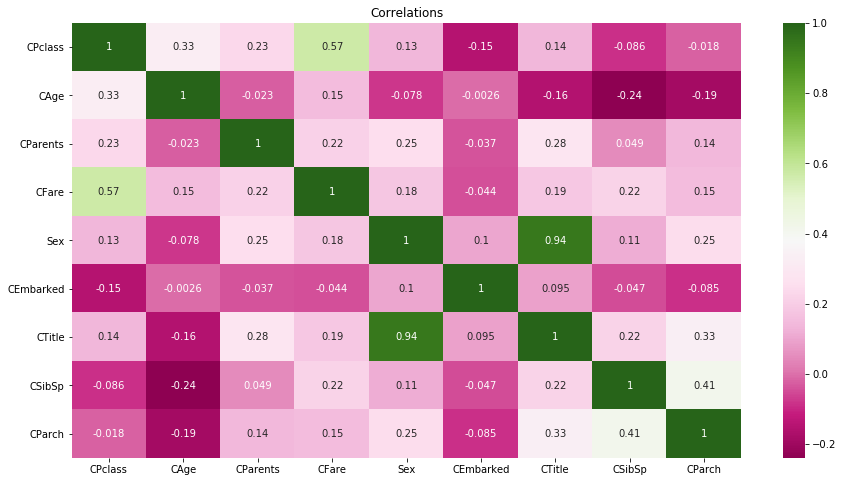

In [32]:
plt.subplots(figsize=[15, 8])
sns.heatmap(train_data[features].corr(), annot=True, cmap='PiYG')
plt.title('Correlations')

In [33]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
X = scaler.fit_transform(X, y)
# X = train_data
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [34]:
models = {}
def create_model(name, model):
    scoring='accuracy'
    scores = cross_val_score(model, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
    model.fit(X,y)
    print("[%s] Accuracy: %0.2f (+/- %0.2f)" % (name, scores.mean(), scores.std() * 2))
    return model

In [35]:
models['RandomForest'] = create_model('RandomForest', RandomForestClassifier())

[RandomForest] Accuracy: 0.81 (+/- 0.07)


In [36]:
models['SVM'] = create_model('SVM', svm.SVC())

[SVM] Accuracy: 0.81 (+/- 0.04)


In [37]:
models['Gaussian'] = create_model('Gaussian', GaussianNB())

[Gaussian] Accuracy: 0.79 (+/- 0.07)


In [38]:
models['LogisticRegression'] = create_model('LogisticRegression', LogisticRegression(max_iter=300))

[LogisticRegression] Accuracy: 0.82 (+/- 0.04)


In [39]:
models['KNN'] = create_model('KNN', KNeighborsClassifier(n_neighbors=7))

[KNN] Accuracy: 0.80 (+/- 0.05)


In [40]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
# 'CPclass', 'CAge', 'CParents', 'CFare', 'Sex', 'CEmbarked'

# Title
test_names = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_names
test_data['CTitle'] = test_names.map(title_mapping)
test_data['CTitle'] = title_scaller.transform(test_data['CTitle'].values.reshape(-1,1))

# Fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['CFare'] =  test_data['Fare'].map(transform_fare)
test_data['CFare'] = test_data['CFare'].map(fare_mapping)
test_data['CFare'] = fare_scaller.transform(test_data['CFare'].values.reshape(-1,1))

# Sex
test_data['Sex'] = test_data.Sex.map(sex_mapping)

# Embarked
test_data['CEmbarked'] = test_data.Embarked.map(embarked_mapping)
test_data['CEmbarked'] = embarked_scaller.transform(test_data['CEmbarked'].values.reshape(-1,1))

# Age
test_data = test_data.apply(median_age, axis=1)
test_data = test_data.apply(age_outliers, axis=1)
test_data['CAge'] = age_scaller.transform(test_data['Age'].values.reshape(-1,1))

# Parents
test_data['Parents'] = test_data['Parch'] + test_data['SibSp']
test_data['CParents'] = test_data['Parents'].map(parent_mapping)
test_data['CParents'] = parent_scaller.transform(test_data['CParents'].values.reshape(-1,1))

# Class
test_data['CPclass'] = test_data['Pclass'].map(class_mapping)
test_data['CPclass'] = class_scaller.transform(test_data['CPclass'].values.reshape(-1,1))

# SibSp
test_data['CSibSp'] = sibsp_scaller.transform(test_data['SibSp'].values.reshape(-1,1))

# Parch
test_data['CParch'] = parch_scaller.fit_transform(test_data['Parch'].values.reshape(-1,1))

In [42]:
Xtrain = test_data[features]

In [43]:
inputs = scaler.transform(Xtrain)

model = svm.SVC()
model.fit(X,y)
# inputs = test_data
prediction = model.predict(inputs)

In [44]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })

filename = 'titanic-arrumado-title-std-all-svm.csv'
submission.to_csv('predictions/'+filename, index=False)

In [45]:
new_file = 'predictions/'+filename
best_file = 'predictions/all-std-svm.csv'

df1 = pd.read_csv(new_file)
df2 = pd.read_csv(best_file)



result = pd.DataFrame(columns=['PassengerId'])
df1['isEqual'] = np.where(df1['Survived'] == df2['Survived'],1,0)

df1[df1['isEqual']== 0]['PassengerId'].values

array([ 896,  928,  929,  931,  941,  964,  979,  982,  990, 1017, 1030,
       1045, 1049, 1051, 1057, 1061, 1089, 1091, 1160, 1172, 1231, 1237,
       1259, 1274, 1275, 1304])

In [46]:
#array([ 911, 1117, 1141, 1231, 1239, 1281])
diference = test_data.iloc[df1[df1['isEqual']== 0]['PassengerId'].index, :]
# diference['Age'].max()
diference.head(20)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title,CTitle,CFare,CEmbarked,CAge,Parents,CParents,CPclass,CSibSp,CParch
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,...,Mrs,1.472579,-0.480629,-0.46615,-0.611917,2,1.351047,-0.856099,0.432793,0.619896
36,928,3,"Roth, Miss. Sarah A",1,29.699118,0,0,342712,8.0500,NaN,...,Miss,1.161879,-0.480629,-0.46615,0.026735,0,-0.606427,-0.856099,-0.474545,-0.400248
37,929,3,"Cacic, Miss. Manda",1,21.000000,0,0,315087,8.6625,NaN,...,Miss,1.161879,-0.480629,-0.46615,-0.694868,0,-0.606427,-0.856099,-0.474545,-0.400248
39,931,3,"Hee, Mr. Ling",0,29.699118,0,0,1601,56.4958,NaN,...,Mr,-0.819574,1.921414,-0.46615,0.026735,0,-0.606427,-0.856099,-0.474545,-0.400248
49,941,3,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",1,36.000000,0,2,C.A. 37671,15.9000,NaN,...,Mrs,1.472579,-0.480629,-0.46615,0.549402,2,1.351047,-0.856099,-0.474545,1.640039
72,964,3,"Nieminen, Miss. Manta Josefina",1,29.000000,0,0,3101297,7.9250,NaN,...,Miss,1.161879,-0.480629,-0.46615,-0.031257,0,-0.606427,-0.856099,-0.474545,-0.400248
87,979,3,"Badman, Miss. Emily Louisa",1,18.000000,0,0,A/4 31416,8.0500,NaN,...,Miss,1.161879,-0.480629,-0.46615,-0.943722,0,-0.606427,-0.856099,-0.474545,-0.400248
90,982,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",1,22.000000,1,0,347072,13.9000,NaN,...,Mrs,1.472579,-0.480629,-0.46615,-0.611917,1,1.351047,-0.856099,0.432793,-0.400248
98,990,3,"Braf, Miss. Elin Ester Maria",1,20.000000,0,0,347471,7.8542,NaN,...,Miss,1.161879,-0.480629,-0.46615,-0.777819,0,-0.606427,-0.856099,-0.474545,-0.400248
125,1017,3,"Cribb, Miss. Laura Alice",1,17.000000,0,1,371362,16.1000,NaN,...,Miss,1.161879,-0.480629,-0.46615,-1.026673,1,1.351047,-0.856099,-0.474545,0.619896
